# Бенчмарк для задачи Digital Reputation Challenge

https://boosters.pro/championship/digital_reputation_challenge/overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

In [2]:
TRAIN_PATH = 'train/'
X1 = pd.read_csv(TRAIN_PATH + 'X1.csv')
X2 = pd.read_csv(TRAIN_PATH + 'X2.csv')
X3 = pd.read_csv(TRAIN_PATH + 'X3.csv')
Y = pd.read_csv(TRAIN_PATH + 'Y.csv')
print (X1.shape, X2.shape, X3.shape, Y.shape)

(4000, 26) (462888, 2) (4000, 453) (4000, 6)


In [3]:
Y.columns = ['Y' + s if s != 'id' else 'id' for s in Y.columns]

In [4]:
TEST_PATH = 'test/'
X1_test = pd.read_csv(TEST_PATH + 'X1.csv')
X2_test = pd.read_csv(TEST_PATH + 'X2.csv')
X3_test = pd.read_csv(TEST_PATH + 'X3.csv')
print (X1_test.shape, X2_test.shape, X3_test.shape)

(4058, 26) (470083, 2) (4058, 453)


## Подготовка обучения и теста

используем только матрицу 1

In [5]:
X = X1.copy()
X = X.merge(Y)
        
id_ = X.pop('id')
y1 = X.pop('Y1')
y2 = X.pop('Y2')
y3 = X.pop('Y3')
y4 = X.pop('Y4')
y5 = X.pop('Y5')

X_test = X1_test.copy()
id__ = X_test.pop('id')

### Эксперименты

In [6]:
import lightgbm as lgb

param = {'n_estimators':1000, 'num_leaves':6, 'objective':'binary',
         'learning_rate': 0.05, 'colsample_bytree': 0.75, 'subsample': 0.75,
        'metric': 'auc'}
         
w = lgb.cv(param, lgb.Dataset(X, label=y1),
           stratified=False,
           num_boost_round=1000, nfold=4, verbose_eval=100)
max(w['auc-mean'])

/Applications/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:502: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	cv_agg's auc: 0.599234 + 0.0195272
[200]	cv_agg's auc: 0.596712 + 0.0170425
[300]	cv_agg's auc: 0.594143 + 0.018375
[400]	cv_agg's auc: 0.591514 + 0.0136669
[500]	cv_agg's auc: 0.58992 + 0.0125364
[600]	cv_agg's auc: 0.58904 + 0.0124033
[700]	cv_agg's auc: 0.587703 + 0.0132646
[800]	cv_agg's auc: 0.586441 + 0.0128174
[900]	cv_agg's auc: 0.584627 + 0.0150158
[1000]	cv_agg's auc: 0.582047 + 0.0148836


0.6020871115003614

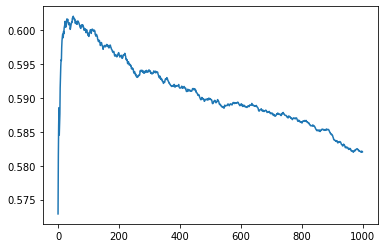

In [7]:
plt.plot(w['auc-mean'])

# Подготовка ответа

In [8]:
a1 = 0.0
for t in range(10):
    model1 = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=6,
                                n_estimators=290,
                                colsample_bytree=0.75, subsample=0.75, random_state=t)
    model1.fit(X, y1)
    a = model1.predict_proba(X_test)[:,1]
    # print (a)
    a1 += a
a1 = a1 / 10

In [9]:
a2 = 0.0
for t in range(10):
    model2 = lgb.LGBMClassifier(learning_rate=0.03, num_leaves=2,
                          n_estimators=378,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model2.fit(X, y2)
    a = model2.predict_proba(X_test)[:,1]
    a2 += a
a2 = a2 / 10

In [10]:
a3 = 0.0
for t in range(10):
    model3 = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=4,
                          n_estimators=543,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model3.fit(X, y3)
    a = model3.predict_proba(X_test)[:,1]
    a3 += a
a3 = a3 / 10

In [11]:
a4 = 0.0
for t in range(10):
    model4 = lgb.LGBMClassifier(learning_rate=0.003, num_leaves=6,
                          n_estimators=618,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model4.fit(X, y4)
    a = model4.predict_proba(X_test)[:,1]
    a4 += a
a4 = a4 / 10

In [12]:
a5 = 0.0
for t in range(10):
    model5 = lgb.LGBMClassifier(learning_rate=0.002, num_leaves=3,
                          n_estimators=516,
                          colsample_bytree=0.75, subsample=0.75, random_state=t)
    model5.fit(X, y5)
    a = model5.predict_proba(X_test)[:,1]
    #print (a)
    a5 += a
a5 = a5 / 10

In [13]:
df = pd.DataFrame({'id': X1_test.id.values,
             '1': a1,
             '2': a2,
             '3': a3,
             '4': a4,
             '5': a5})
df.to_csv('results.csv', index=False)
df.head()

,id,1,2,3,4,5
0,0,0.329206,0.339997,0.273365,0.275298,0.392948
1,1,0.338131,0.239503,0.297156,0.253666,0.422096
2,2,0.409246,0.479009,0.225113,0.277080,0.392853
3,4,0.318341,0.284155,0.235363,0.275298,0.339467
4,7,0.353122,0.262029,0.444819,0.358840,0.405003
